# Importing dependencies 

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fast')
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Chossing a style ( can see the list using the code : plt.style.available
plt.style.use('default')

In [2]:
# Loading csv file
df = pd.read_csv('data_science_job.csv')

# Introductory EDA

In [3]:
# Checking the shape of the dataframe
df.shape

(19158, 13)

In [4]:
# Checking any 5 random rows
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
14716,11807,city_21,0.624,NaN,No relevent experience,Full time course,High School,NaN,0.0,NaN,NaN,44.0,1.0
10850,2745,city_71,0.884,Male,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,8.0,1.0
13547,31526,city_16,0.910,Female,No relevent experience,no_enrollment,Graduate,Business Degree,0.0,1000-4999,Pvt Ltd,NaN,0.0
16052,2675,city_23,0.899,Male,Has relevent experience,Part time course,Graduate,STEM,10.0,1000-4999,Pvt Ltd,70.0,0.0
6939,16879,city_103,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,2.0,10/49,Pvt Ltd,5.0,1.0


In [5]:
# Let's get some basic informatin about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [6]:
# Optimizing the memory by using appropriate data types
int_cols = df.select_dtypes(include=np.int64)
float_cols = df.select_dtypes(include=np.float64)

df[int_cols.columns] = df[int_cols.columns].astype(np.int32)
df[float_cols.columns] = df[float_cols.columns].astype(np.float32)

In [7]:
# Descriptive information about the data
df.describe()

,enrollee_id,city_development_index,experience,training_hours,target
count,19158.000000,18679.000000,19093.000000,18392.000000,19158.000000
mean,16875.358179,0.828951,9.928037,65.185791,0.249348
std,9616.292592,0.123334,6.505268,59.885624,0.432647
min,1.000000,0.448000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,88.000000,0.000000
max,33380.000000,0.949000,20.000000,336.000000,1.000000


In [8]:
# Checking percentage of null values
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [9]:
# Checking duplicated values
print("Duplicate values :",df.duplicated().sum())

Duplicate values : 0


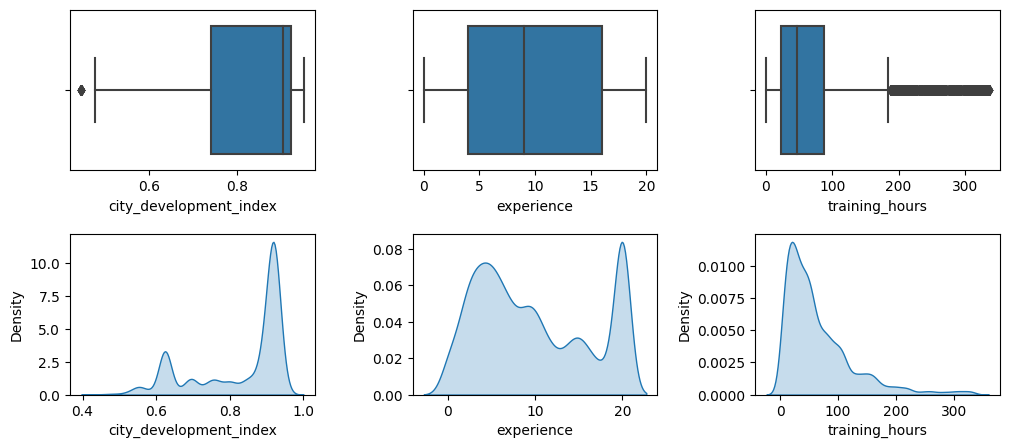

In [42]:
# Let's check if there are any outliers
fig,ax = plt.subplots(2,3,figsize=(12,5))

sns.boxplot(x = df['city_development_index'],ax = ax[0][0])
sns.boxplot(x = df['experience'],ax = ax[0][1])
sns.boxplot(x = df['training_hours'],ax = ax[0][2])

sns.kdeplot(data = df['city_development_index'],ax = ax[1][0],fill=True)
sns.kdeplot(data = df['experience'],ax = ax[1][1],fill=True)
sns.kdeplot(data = df['training_hours'],ax = ax[1][2],fill=True)

plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.show()

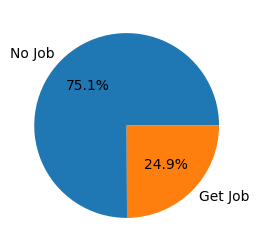

In [18]:
# Plot a pie chart 0 -> No job and 1 -> Get job
fig,ax = plt.subplots(figsize = (3,3))

plt.pie(df['target'].value_counts(), labels=['No Job', 'Get Job'],autopct='%1.1f%%')
plt.show()

# Data Cleaning

During this phase the things which we will be doing are 

1. Dropping unnecessary columns
1. Handling imbalance data
2. Dealing with missing values

In [10]:
# Seperating the data into dependent and independent variable
y = df['target']
X = df.drop('target',axis=1)

# Creating an object of RandomOVerSampler class
rs = RandomOverSampler()
X_new,y_new = rs.fit_resample(X,y)

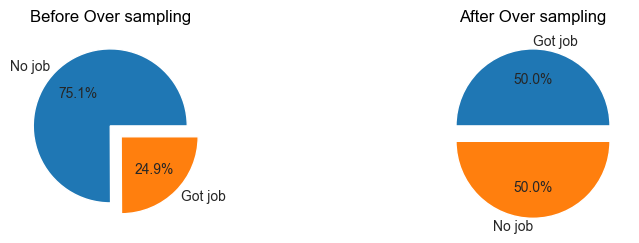

In [11]:
# Let's visualize distribution of the classes in the target variable before and after 
fig,ax = plt.subplots(1,2,figsize=(10,2.5))
ex = (0,0.2)
sns.set_style("whitegrid")

ax[0].pie(df['target'].value_counts(), labels=['No job','Got job'], autopct='%1.1f%%', explode=ex)
ax[0].set(title='Before Over sampling')
ax[1].pie(y_new.value_counts(), labels=['Got job','No job'], autopct='%1.1f%%', explode=ex)
ax[1].set(title='After Over sampling')

# show the plot
plt.show()

In [20]:
# Dropping the unnecessary columns from the dataframe
df = df.drop(['enrollee_id','city','gender','company_type'],axis=1)
df.head(3)

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,training_hours,target
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,36.0,1.0
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,47.0,0.0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,83.0,0.0


In [43]:
# Let's take out features having missing value percentage less than 5% 
cols_less5_per = [col for col in df.columns if df[col].isnull().mean()*100 <5 and df[col].isnull().mean()*100>0]

# Let's create 2 copy to compare the change in distribution
remove_nan = df[cols_less5_per].copy()
impute_nan = df[cols_less5_per].copy()

In [44]:
# Dropping all the rows having column values as NaN
remove_nan.dropna(inplace=True)

Since city_development_index, experience and training hours are numerical features so we will use mean imputation, whereas for the remaining features we will do mode imputation.

In [45]:
# Mean imputation
impute_nan['city_development_index'].fillna(df['city_development_index'].mean(),inplace=True)
impute_nan['experience'].fillna(df['city_development_index'].mean(),inplace=True)
impute_nan['training_hours'].fillna(df['city_development_index'].mean(),inplace=True)

# Mode imputation
impute_nan['enrolled_university'].fillna(impute_nan['enrolled_university'].mode().values[0],inplace=True)
impute_nan['education_level'].fillna(impute_nan['education_level'].mode().values[0],inplace=True)

[Text(0.5, 1.0, 'Distribution comparision of training hours')]

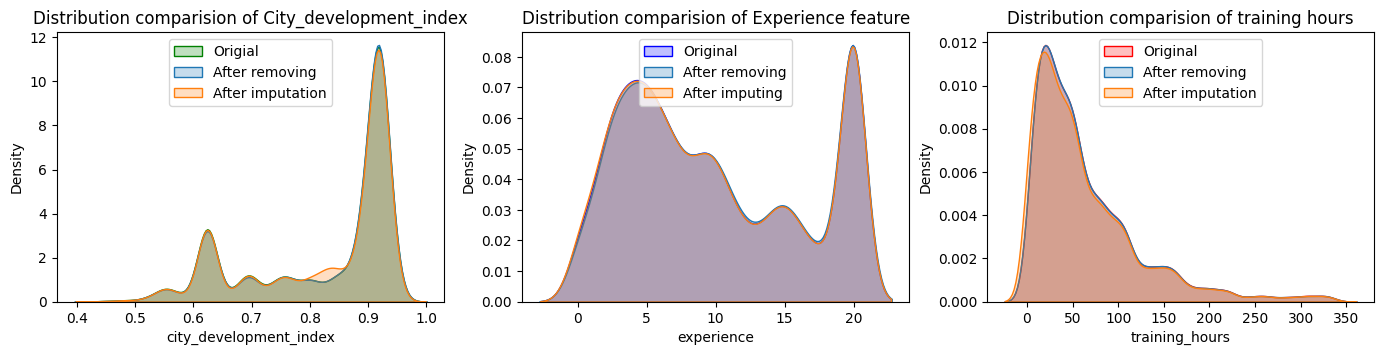

In [46]:
# Now let's visualize the distributions before and after implemnting CCA on numerical features
fig, ax = plt.subplots(1, 3, figsize=(17, 3.5))

sns.kdeplot(df['city_development_index'], fill=True,ax=ax[0], color='green', label='Origial')
sns.kdeplot(remove_nan['city_development_index'], fill=True,ax=ax[0], label='After removing')
sns.kdeplot(impute_nan['city_development_index'], fill=True,ax=ax[0], label='After imputation')
ax[0].legend(loc='upper center')
ax[0].set(title='Distribution comparision of City_development_index')

sns.kdeplot(df['experience'], fill=True,ax=ax[1], color='blue', label='Original')
sns.kdeplot(remove_nan['experience'], fill=True,ax=ax[1], label='After removing')
sns.kdeplot(impute_nan['experience'], fill=True,ax=ax[1], label='After imputing')
ax[1].legend(loc='upper center')
ax[1].set(title='Distribution comparision of Experience feature')

sns.kdeplot(df['training_hours'], fill=True,ax=ax[2], color='red', label='Original')
sns.kdeplot(remove_nan['training_hours'], fill=True,ax=ax[2], label='After removing')
sns.kdeplot(impute_nan['training_hours'], fill=True,ax=ax[2], label='After imputation')
ax[2].legend(loc='upper center')
ax[2].set(title='Distribution comparision of training hours')

For the categorical columns we will check the ratio of categories before and after applying PCA

In [47]:
# For the categorical features we will check the ratio of classes before and after implementing CCA
compare_eu = pd.concat([df['enrolled_university'].value_counts() / len(df),
                    remove_nan['enrolled_university'].value_counts() / len(remove_nan),
                    impute_nan['enrolled_university'].value_counts()/len(impute_nan)],axis=1)

compare_eu.columns = ['Original','After removing','After imputation']
compare_eu

,Original,After removing,After imputation
enrolled_university,,,
no_enrollment,0.721213,0.735188,0.741361
Full time course,0.196106,0.200733,0.196106
Part time course,0.062533,0.064079,0.062533


In [48]:
compare_edu_level = pd.concat([ df['education_level'].value_counts() / len(df),
                        remove_nan['education_level'].value_counts() / len(remove_nan),
                        impute_nan['education_level'].value_counts()/len(impute_nan)],axis=1)

compare_edu_level.columns = ['Original','After removing','After imputation']
compare_edu_level

,Original,After removing,After imputation
education_level,,,
Graduate,0.605387,0.619835,0.629398
Masters,0.227633,0.234082,0.227633
High School,0.105282,0.107380,0.105282
Phd,0.021610,0.022116,0.021610
Primary School,0.016077,0.016587,0.016077


In [19]:
# Dropping missing values in original dataframe
df.dropna(subset = ['city_development_index'],inplace=True)

# Mean value imputation in original dataframe
df['experience'].fillna(df['city_development_index'].mean(),inplace=True)
df['training_hours'].fillna(df['city_development_index'].mean(),inplace=True)

# Mode value imputation in original dataframe
df['enrolled_university'].fillna(df['enrolled_university'].mode().values[0],inplace=True)
df['education_level'].fillna(df['education_level'].mode().values[0],inplace=True)

# Pipeline

We will be creating a pipeline for efficient data cleaning and data processing. 

In [73]:
# Column transformer for dealing with missing values and outliers
nan_values_outliers = ColumnTransformer(transformers=[('Num_data', SimpleImputer(), [0, 5, 7]),
                                                      ('Cat_data', SimpleImputer(strategy='most_frequent'), [1, 2, 3, 4, 6]),
                                                      ('Outliers', RobustScaler(), [0, 5, 7])],
                                                      remainder= 'passthrough')

# Column transformer to encode categorical values
encode_values = ColumnTransformer(transformers=[('Encode_nominal_md', OneHotEncoder(), [4]),
                                                ('Encode_ordinal_Re', OrdinalEncoder(categories=['No relevent experience', 'Has relevent experience']), [1]),
                                                ('Encode_ordinal_eu', OrdinalEncoder(categories=['no_enrollment', 'Part time course', 'Full time course']), [2]),
                                                ('Encode_ordinal_el', OrdinalEncoder(categories=['Primary School', 'High School', 'Graduate', 'Masters', 'Phd']), [3]),
                                                ('Encode_ordinal_cs', OrdinalEncoder(categories=['<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']), [6])],
                                                remainder='passthrough')

# Column transformer to do feature scaling
scaling_transformer = ColumnTransformer(transformers=[('Scale', MinMaxScaler(), [0, 5, 7])],
                                                      remainder='passthrough')

# Let's now combine all transformers into a single pipeline
pipe = Pipeline(steps=[('Handle_Nan_Outliers', nan_values_outliers),
                       ('Encode_data', encode_values),
                       ('Scale_values', scaling_transformer)])


In [74]:
# Let's split the data into train,test and validation
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)
X_train, X_val = train_test_split(X_train,test_size=0.25, random_state=42)

In [77]:
X_train

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,training_hours,target
13810,0.913,Has relevent experience,no_enrollment,Graduate,STEM,6.0,50-99,304.0,0.0
3426,0.924,No relevent experience,Part time course,Graduate,STEM,19.0,10000+,81.0,0.0
1651,0.926,Has relevent experience,no_enrollment,Graduate,STEM,10.0,<10,76.0,0.0
14320,0.887,Has relevent experience,Part time course,Graduate,STEM,20.0,NaN,53.0,0.0
9744,0.527,No relevent experience,no_enrollment,Graduate,STEM,5.0,NaN,92.0,0.0
...,...,...,...,...,...,...,...,...,...
2588,0.920,Has relevent experience,no_enrollment,Masters,STEM,20.0,NaN,70.0,0.0
6548,0.920,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,184.0,0.0
10289,0.558,No relevent experience,Full time course,High School,NaN,4.0,<10,87.0,0.0
18107,0.920,Has relevent experience,no_enrollment,NaN,NaN,20.0,10000+,62.0,0.0


In [75]:
# Let's tranform the training data
X_train = pipe.fit_transform(X_train)

ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).

In [22]:
remove_outliers = df[['city_development_index','training_hours']].copy()
cap_outliers = df[['city_development_index','training_hours']].copy()

In [23]:
# Let's create a function for finding Uppper and lower limit
def find_limits(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    IQR = q3-q1
    Upper_lmt = q3 + 1.5*IQR
    Lower_lmt = q1 - 1.5*IQR
    return [Upper_lmt,Lower_lmt]

In [24]:
# Calling the function to find the limits
lmts_city_dev_index = find_limits(remove_outliers['city_development_index'])
lmts_trainng_hrs = find_limits(remove_outliers['training_hours'])

In [25]:
# Let's first cap the outliers
cap_outliers['city_development_index'] = np.where(
                                            cap_outliers['city_development_index']>lmts_city_dev_index[0],lmts_city_dev_index[0],
                                            np.where(cap_outliers['city_development_index']<lmts_city_dev_index[1],lmts_city_dev_index[1],
                                            cap_outliers['city_development_index']))
    
cap_outliers['training_hours'] = np.where(
                                            cap_outliers['training_hours']>lmts_trainng_hrs[0],lmts_trainng_hrs[0],
                                            np.where(cap_outliers['training_hours']<lmts_trainng_hrs[1],lmts_trainng_hrs[1],
                                            cap_outliers['training_hours']))

In [26]:
# Let's now remove the outliers
remove_outliers['city_development_index'] = remove_outliers['city_development_index'][remove_outliers['city_development_index'] > lmts_city_dev_index[1]]
remove_outliers['training_hours'] = remove_outliers['training_hours'][remove_outliers['training_hours'] < lmts_trainng_hrs[0]]

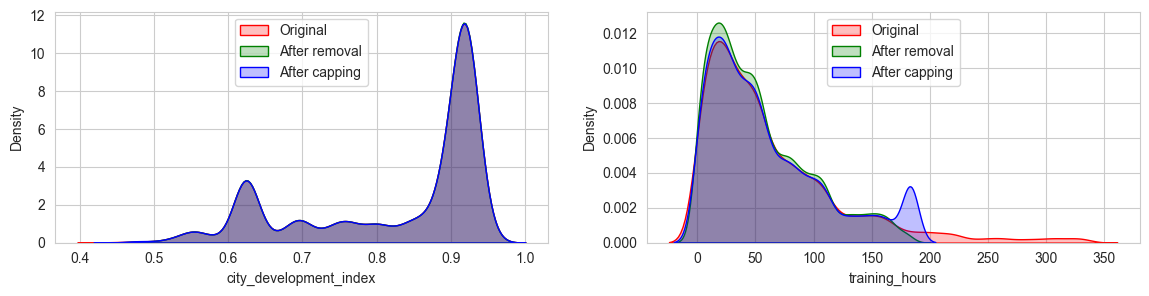

In [27]:
# Now lets visualize the change in the distribution before and after capping the outliers
fig,ax = plt.subplots(1,2,figsize = (14,3))

sns.kdeplot(df['city_development_index'],fill=True,color='red',label='Original',ax = ax[0]).legend(loc='upper center')
sns.kdeplot(remove_outliers['city_development_index'],fill=True,color='green',label='After removal',ax = ax[0]).legend(loc='upper center')
sns.kdeplot(cap_outliers['city_development_index'],fill=True,color='blue',label='After capping',ax = ax[0]).legend(loc='upper center')

sns.kdeplot(df['training_hours'],fill=True,color='red',label='Original',ax = ax[1]).legend(loc='upper center')
sns.kdeplot(remove_outliers['training_hours'],fill=True,color='green',label='After removal',ax = ax[1]).legend(loc='upper center')
sns.kdeplot(cap_outliers['training_hours'],fill=True,color='blue',label='After capping',ax = ax[1]).legend(loc='upper center')

In training_hours feature becasue of presence of a lot of outliers the distribution is chaning a lot after capping so we will move on with removing the outliers, whereas in city_development_index there is no significant change in distributuion even after removing or capping outliers so we will move on with capping the outliers.

In [28]:
# Let's cap outiers in city_development_index of original dataframe
df['city_development_index'] = np.where(
                                        df['city_development_index']>lmts_city_dev_index[0],lmts_city_dev_index[0],
                                        np.where(df['city_development_index']<lmts_city_dev_index[1],lmts_city_dev_index[1],
                                        df['city_development_index'])
                                        )

In [29]:
# Let's remove outliers in training_hours feature of original dataframe
df = df[df['training_hours'] < lmts_trainng_hrs[0]]

In [30]:
# Let's take all those features in which percentage of missing value is more than 5%
cols_more5_per = [cols for cols in df.columns if df[cols].isnull().mean()*100 >5]
Temp_df = df[cols_more5_per].copy()

In [31]:
# Let's do the mode imputation
for cols in Temp_df.columns:
    Temp_df[cols].fillna(Temp_df[cols].mode()[0],inplace=True)

In [32]:
# Create a dataframe to compare the original and imputed values of 'gender'
compare_major = pd.concat([df['major_discipline'].value_counts(normalize=True), Temp_df['major_discipline'].value_counts(normalize=True)], axis=1)
compare_major.columns = ['Original', 'After Imputation']
compare_major

,Original,After Imputation
STEM,0.885965,0.902740
Humanities,0.041052,0.035014
Other,0.023468,0.020016
Business Degree,0.019964,0.017028
Arts,0.015667,0.013363
No Major,0.013882,0.011840


The ratio of categorical values is changin but for now just to keep gonig we will do mode imputation

In [33]:
# Mode imputtion in the original dataframe
for cols in Temp_df.columns:
    df[cols].fillna(df[cols].mode()[0],inplace=True)

# Understanding data through visualizations

1. Does individuals with relevent experience gets more job ?
2. Does the individuals with full time enrollment gets more job than part time enrollment or no enrollment at all?
3. Individuals with which education level get most jobs ?
4. Does individuals with STEM backgroun get more jobs?
5. In which company size inidividuals gets more jobs ?
6. Which type of company hires the most ?

In [34]:
# Let's create subplots
# fig,ax = plt.subplots(3,2 ,figsize = (17,16))

# temp1 = df.groupby('relevent_experience')['target'].sum()
# temp2 = df.groupby('enrolled_university')['target'].sum()
# temp3 = df.groupby('education_level')['target'].sum()
# temp4 = df.groupby('major_discipline')['target'].sum()
# temp5 = df.groupby('company_size')['target'].sum()
# temp6 = df.groupby('company_type')['target'].sum()

# sns.barplot(x = temp1.index,y = temp1,ax = ax[0][0],saturation=2).set(title='Relevent experience Vs Number of jobs')
# sns.barplot(x = temp2.index,y = temp2,ax = ax[0][1],saturation=2).set(title='Univesity enrollment Vs Number of jobs')
# sns.barplot(x = temp3.index,y = temp3,ax = ax[1][0],saturation=2).set(title='Education level Vs Number of jobs')
# sns.barplot(x = temp4.index,y = temp4,ax = ax[1][1],saturation=2).set(title='Major discipline Vs Number of jobs')
# sns.barplot(x = temp5.index,y = temp5,ax = ax[2][0],saturation=2).set(title='Company Size Vs Number of jobs')
# sns.barplot(x = temp6.index,y = temp6,ax = ax[2][1],saturation=2).set(title='Company type Vs Number of jobs')

# Feature engineering

- Encode the categorical variables
- Feature scaling

In [35]:
categorical_cols = df.select_dtypes(include='object')
categorical_cols.head(5)

,relevent_experience,enrolled_university,education_level,major_discipline,company_size
0,Has relevent experience,no_enrollment,Graduate,STEM,50-99
1,No relevent experience,no_enrollment,Graduate,STEM,50-99
2,No relevent experience,Full time course,Graduate,STEM,50-99
3,No relevent experience,no_enrollment,Graduate,Business Degree,50-99
4,Has relevent experience,no_enrollment,Masters,STEM,50-99


Out of all the categorical columns : enrolled_university,company_size,relevent_experience and education level are ordinal categorical columns, rest all are nominal categorical columns.

In [38]:
# replace 'High School' and 'Primary School' with 'Schooling'
df['education_level'] = df['education_level'].replace(['High School', 'Primary School'], 'Schooling')

In [37]:
# Let's do ordinal encoding 
map_enrolled_uni = {'no_enrollment':1, 'Full time course':3, 'Part time course':2}
map_edu_level = {'Graduate':2, 'Masters':3,'Phd':4, 'Schooling':1}
map_exp = {'Has relevent experience':2,'No relevent experience':1}
map_company_size = {'50-99':3, '<10':1, '10000+':8, '5000-9999':7, '1000-4999':6, '10/49':2,'100-500':4, '500-999':5}

df['enrolled_university'] = df['enrolled_university'].map(map_enrolled_uni)
df['education_level'] = df['education_level'].map(map_edu_level)
df['relevent_experience'] = df['relevent_experience'].map(map_exp)
df['company_size'] = df['company_size'].map(map_company_size)

<Axes: >

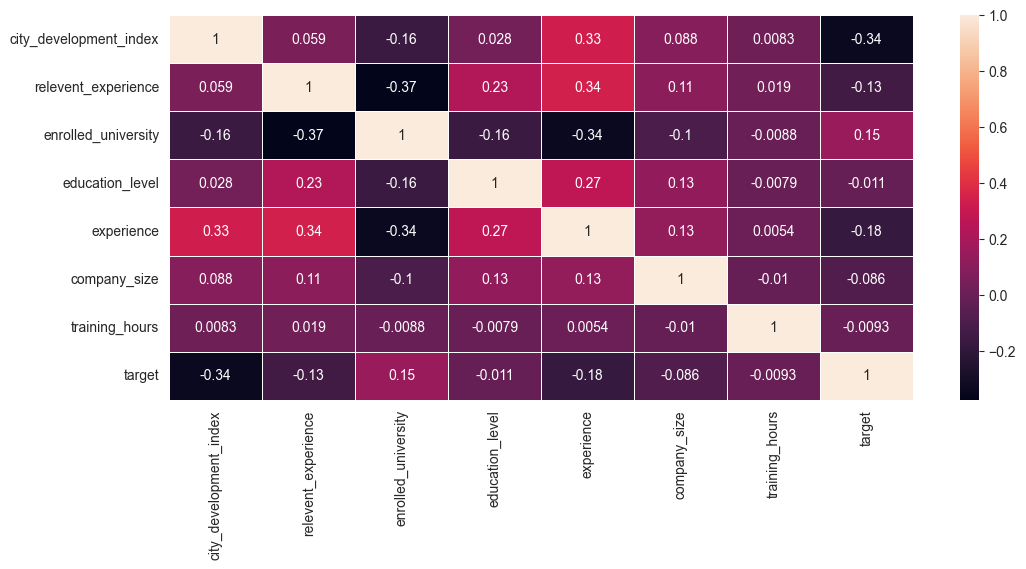

In [38]:
f, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)

Since training_hours is having like almost 0 correlation with target variable and other features thus we will remove it

In [39]:
# Dropping the training_hours feature
df.drop('training_hours',axis=1,inplace=True)

In [40]:
# One hot encoding 
df = pd.get_dummies(df,columns = ['major_discipline'],drop_first=True)

<Axes: >

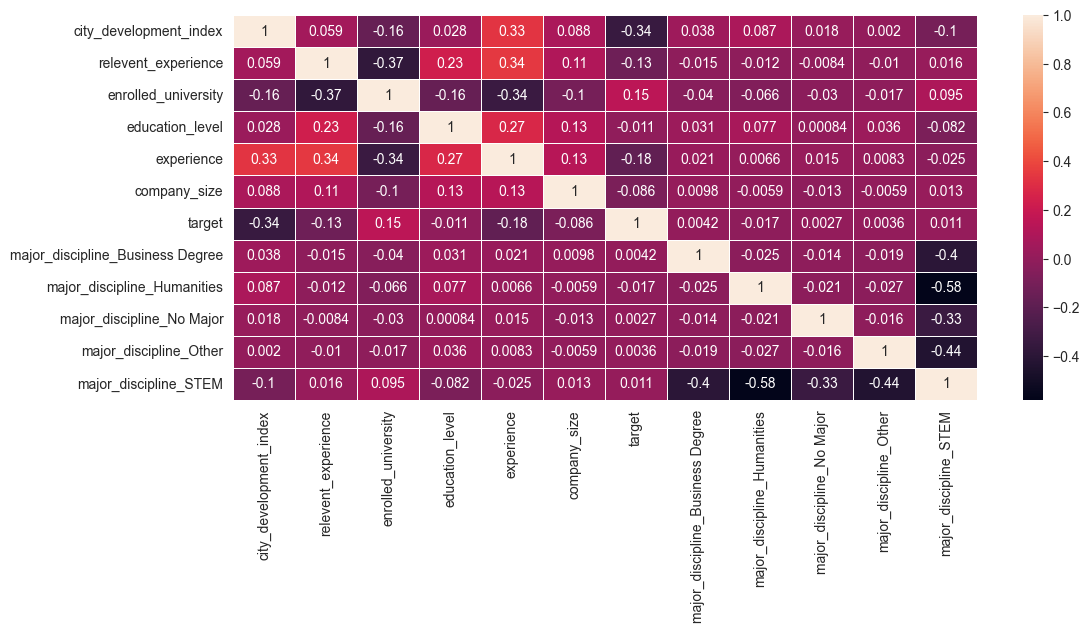

In [41]:
f, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)

Since major_discpline one hot encoded are having almost 0 correlation with target and other variables thus we will remove them

In [42]:
df.drop(['major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM'],axis=1,inplace=True)

In [43]:
# Let's create an object of MinMax scaler
scaler = MinMaxScaler()

In [44]:
y = df['target']
X = df.drop(['target','city_development_index'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42,stratify=y)

In [45]:
# Feature scaling
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [46]:
# Again creating dataframes
X_train = pd.DataFrame(X_train_sc,columns = X_train.columns)
X_test = pd.DataFrame(X_test_sc,columns = X_test.columns)

new_df = pd.concat([X_train,X_test],axis=0)

In [47]:
# Reseting the index
new_df.reset_index(inplace=True,drop=True)
df.reset_index(inplace=True,drop=True)
new_df['city_development_index'] = df['city_development_index']
new_df['target'] = df['target']

In [48]:
# Let's do train test split
y = new_df['target']
X = new_df.drop(['target'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42,stratify=y)

In [49]:
X_train.columns

Index(['relevent_experience', 'enrolled_university', 'education_level',
       'experience', 'company_size', 'city_development_index'],
      dtype='object')

In [49]:
# Extracting the values
X_train = X_train.values
X_test = X_test.values

# Model training 

In [50]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred  =  model.predict(X_test)

# Model evaluation

In [52]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Calculating precision
precision = precision_score(y_test, y_pred, average='macro')
print("Precision: ", precision)

# Calculating recall
recall = recall_score(y_test, y_pred, average='macro')
print("Recall: ", recall)

# Calculating F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score: ", f1)

Accuracy:  0.762262732569066
Precision:  0.6773034303140169
Recall:  0.5778207386982622
F1 Score:  0.5805938387455896


In [ ]:
# Saving model as pickle file
pickle.dump(model,